In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [2]:
df1 = pd.read_csv('coches-de-segunda-mano-sample.csv')
df1

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [4]:
df1["fuel"].unique()

array(['Diésel', 'Gasolina', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)', nan],
      dtype=object)

In [5]:
df1.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

In [6]:
df1.drop(columns= ['url', 'company','dealer','price_financed','publish_date', 'insert_date','country'],inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49998 non-null  object 
 1   model            49995 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49954 non-null  object 
 5   year             49998 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  photos           50000 non-null  int64  
 12  is_professional  50000 non-null  bool   
 13  province         49994 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 5.0+ MB


In [8]:
df1["province"].unique()

array(['Navarra', 'Tenerife', 'Barcelona', 'Sevilla', 'Madrid',
       'Baleares', 'Alicante', 'Murcia', 'Guipúzcoa', 'Málaga', 'Jaén',
       'Las Palmas', 'Granada', 'Lugo', 'Huelva', 'Asturias',
       'Pontevedra', 'Córdoba', 'Zaragoza', 'León', 'A Coruña',
       'Cantabria', 'Toledo', 'Vizcaya', 'Burgos', 'Lleida', 'Almería',
       'Badajoz', 'Álava', 'Valencia', 'Cádiz', 'La Rioja', 'Girona',
       'Ciudad Real', 'Ávila', 'Tarragona', 'Orense', 'Segovia',
       'Cáceres', 'Cuenca', 'Albacete', 'Castellón', 'Guadalajara',
       'Huesca', 'Teruel', 'Valladolid', 'Salamanca', 'Soria', 'Palencia',
       'Zamora', 'Ceuta', nan, 'Melilla'], dtype=object)

In [9]:
df1["province"].value_counts()

province
Madrid         9638
Barcelona      5856
Valencia       3533
Sevilla        2552
Málaga         2303
Alicante       2103
Vizcaya        1392
Murcia         1364
Las Palmas     1136
Zaragoza       1055
A Coruña        993
Pontevedra      956
Granada         890
Tarragona       872
Asturias        864
Baleares        743
Tenerife        727
Badajoz         722
Toledo          705
Girona          650
Navarra         649
Castellón       641
Córdoba         616
Cádiz           605
Valladolid      589
Cantabria       560
Guipúzcoa       526
Jaén            489
Burgos          487
Almería         481
Salamanca       471
Lleida          469
Ciudad Real     445
Álava           409
Albacete        375
Lugo            369
Huelva          366
León            357
Cáceres         326
La Rioja        302
Orense          237
Guadalajara     188
Huesca          163
Ávila           143
Cuenca          133
Zamora          121
Segovia         120
Palencia        112
Teruel          109
Soria      

In [10]:
filas_con_nan = df1[df1['province'].isnull()]

In [11]:
filas_con_nan

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
4657,FORD,Fusion,FORD Fusion 1.4 TDCI Elegance,500,Diésel,2003.0,279000,68.0,5,Manual,Negro,5,False,NaN
5010,HYUNDAI,Getz,HYUNDAI Getz 1.5 CRDi 88cv AA 5p.,2500,Diésel,2006.0,132000,88.0,5,Manual,Negro,9,False,NaN
10770,AUDI,A4,AUDI A4 Avant 2.0 TDI 140cv 5p.,5500,Diésel,2007.0,180000,140.0,5,Manual,Negro,10,False,NaN
14163,VOLKSWAGEN,Touran,VOLKSWAGEN Touran 2.0 TDI 140 Traveller 5p.,4990,Diésel,2007.0,268000,140.0,5,Manual,Negro,9,False,NaN
18125,CITROEN,C3,CITROEN C3 1.4 HDi X 5p.,2900,Diésel,2002.0,177572,70.0,5,Manual,Azul,6,False,NaN
32024,SUBARU,Impreza,SUBARU Impreza 2.0R SPORT 5p.,7500,Gasolina,2009.0,151000,150.0,5,Manual,Negro,9,False,NaN


voy a rellenar con madrid 


In [12]:
marcas_con_nan = df1[df1['make'].isnull()]

In [13]:
marcas_con_nan

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
5659,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,3,37.0,3,Automático,Beige,16,True,Burgos
47381,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,6,37.0,3,Automático,Azul,15,True,Burgos


la marca es invicta

In [14]:
df1["make"].value_counts()

make
VOLKSWAGEN        4624
BMW               4510
MERCEDES-BENZ     4227
AUDI              3745
PEUGEOT           3314
                  ... 
DAIHATSU             1
ALPINE               1
VAZ                  1
DR AUTOMOBILES       1
LDV                  1
Name: count, Length: 75, dtype: int64

In [15]:
df1["make"].unique()

array(['SEAT', 'CITROEN', 'FORD', 'VOLKSWAGEN', 'PEUGEOT', 'LAND-ROVER',
       'HONDA', 'NISSAN', 'MERCEDES-BENZ', 'FIAT', 'SKODA', 'BMW',
       'MAZDA', 'OPEL', 'AUDI', 'VOLVO', 'MITSUBISHI', 'RENAULT', 'KIA',
       'DACIA', 'HYUNDAI', 'JEEP', 'SUZUKI', 'CHEVROLET', 'SSANGYONG',
       'ABARTH', 'SMART', 'JAGUAR', 'TOYOTA', 'PORSCHE', 'SAAB', 'MINI',
       'CHRYSLER', 'MG', 'IVECO', 'DS', 'CADILLAC', 'INFINITI',
       'ASTON MARTIN', 'ALFA ROMEO', 'LEXUS', 'DODGE', 'TESLA',
       'DR AUTOMOBILES', 'LANCIA', 'SUBARU', 'DAEWOO', 'BENTLEY',
       'MASERATI', 'GALLOPER', 'ISUZU', 'ROVER', 'CUPRA', 'VAZ', 'DFSK',
       nan, 'PONTIAC', 'FERRARI', 'MAHINDRA', 'TATA', 'CORVETTE',
       'ALPINE', 'LAMBORGHINI', 'LOTUS', 'HUMMER', 'SANTANA', 'LADA',
       'DAIHATSU', 'UMM', 'AUSTIN', 'MAXUS', 'MORGAN', 'ARO', 'PIAGGIO',
       'IVECO-PEGASO', 'LDV'], dtype=object)

In [16]:
models_con_nan = df1[df1['model'].isnull()]

In [17]:
models_con_nan


,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
1330,SEAT,NaN,SEAT Cordoba 5p.,1850,Diésel,2004.0,248000,NaN,5,Manual,Gris / Plata,6,False,Córdoba
25574,SEAT,NaN,SEAT Toledo 4p.,1100,Diésel,2002.0,369000,NaN,4,Manual,NaN,4,False,Toledo
31826,SEAT,NaN,SEAT,2400,Diésel,2008.0,370000,NaN,5,Manual,Gris / Plata,4,False,Toledo
32831,SEAT,NaN,SEAT Leon 5p.,3500,Diésel,2003.0,333000,NaN,5,Manual,Negro,5,False,León
37683,SEAT,NaN,SEAT Toledo 1.9 TDI STELLA 110CV 4p.,860,Diésel,1999.0,367963,110.0,4,Manual,Gris / Plata,12,True,Toledo


In [18]:
version_seat = df1[(df1['version']== "SEAT" )& (df1["year"]== 2008)]

In [19]:
version_seat_sorted = version_seat.sort_values(by='price')

In [20]:
version_seat_sorted

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
31826,SEAT,NaN,SEAT,2400,Diésel,2008.0,370000,NaN,5,Manual,Gris / Plata,4,False,Toledo
45827,SEAT,Ibiza,SEAT,2400,Diésel,2008.0,303000,NaN,5,Manual,Rojo,10,False,Burgos
38466,SEAT,Córdoba,SEAT,2600,Gasolina,2008.0,167857,NaN,5,Manual,Gris / Plata,0,False,Málaga
32694,SEAT,Córdoba,SEAT,2600,Diésel,2008.0,300000,NaN,5,Manual,Gris / Plata,0,False,Toledo
28546,SEAT,Ibiza,SEAT,2650,Diésel,2008.0,298000,NaN,5,Manual,Gris / Plata,7,False,Tenerife
46176,SEAT,León,SEAT,2999,Diésel,2008.0,266000,NaN,5,Manual,Blanco,9,False,Barcelona
9530,SEAT,León,SEAT,3200,Diésel,2008.0,228000,NaN,5,Manual,Negro,8,False,Madrid
19672,SEAT,Ibiza,SEAT,3500,Diésel,2008.0,229000,NaN,5,Manual,Rojo,9,False,Madrid
43269,SEAT,León,SEAT,3600,Diésel,2008.0,241000,NaN,5,Manual,Gris / Plata,0,False,Murcia
39370,SEAT,Ibiza,SEAT,3800,Diésel,2008.0,200000,NaN,5,Manual,Blanco,0,False,Madrid


In [21]:
seat = df1[df1['make']== "SEAT"]
seat

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False,Navarra
34,SEAT,Ibiza,SEAT Ibiza 1.0 EcoTSI 81kW 110CV FR DSG 5p.,11400,Gasolina,2017.0,28000,110.0,5,Automático,Negro,6,False,Barcelona
47,SEAT,León,SEAT Leon 1.6 TDI 110cv StSp Style 5p.,10500,Diésel,2016.0,127000,110.0,5,Manual,Blanco,27,True,Cantabria
49,SEAT,León,SEAT Leon 2.0 TDI 110kW DSG7 SS FR Go L 5p.,26400,Diésel,2020.0,50,150.0,5,Automático,Negro,14,True,Toledo
97,SEAT,Arona,SEAT Arona 1.6 TDI 85kW 115CV FR Editio Eco 5p.,19900,Diésel,2019.0,17788,115.0,5,Manual,Blanco (negro),22,True,Córdoba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,SEAT,Ibiza,SEAT Ibiza 3p.,1500,Diésel,2004.0,231000,NaN,3,Manual,Negro,5,False,Cantabria
49960,SEAT,León,SEAT Leon 1.5 EcoTSI 96kW 130CV StSp Style 5p.,14995,Gasolina,2019.0,19177,130.0,5,Manual,Rojo,54,True,Alicante
49986,SEAT,Arona,SEAT Arona 1.0 TSI 70kW 95CV Style Go Eco 5p.,18646,Gasolina,2020.0,0,95.0,5,Manual,Gris / Plata,11,True,Madrid
49993,SEAT,León,SEAT Leon ST 1.8 TSI 132kW 180CV StSp FR Plus 5p.,19490,Gasolina,2017.0,67900,180.0,5,Manual,Blanco,34,True,Barcelona


In [22]:
seatdos = df1[(df1['make']== "SEAT")  & (df1["year"]== 2008)]
seatdos

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
2034,SEAT,León,SEAT Leon 1.9 TDI 105cv Ecomotive Style 5p.,5500,Diésel,2008.0,219000,105.0,5,Manual,Azul,9,True,Salamanca
2554,SEAT,Ibiza,SEAT Ibiza 1.4 16v 85cv Reference 3p.,4000,Gasolina,2008.0,93000,85.0,3,Manual,Negro,8,False,Barcelona
2878,SEAT,León,SEAT Leon 2.0 TDI 140cv Stylance 5p.,3000,Diésel,2008.0,288000,140.0,5,Manual,Gris / Plata,9,False,Barcelona
4638,SEAT,Ibiza,SEAT Ibiza 1.2 12v 70cv Reference 5p.,4900,Gasolina,2008.0,120000,70.0,5,Manual,Blanco (BLANCO),17,True,Barcelona
5592,SEAT,Ibiza,SEAT Ibiza 1.4 16v 85cv Reference 5p.,4900,Gasolina,2008.0,168337,85.0,5,Manual,Negro,6,True,Málaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47324,SEAT,Ibiza,SEAT Ibiza 1.9 TDI 105cv Stylance DPF 5p.,5300,Diésel,2008.0,179000,105.0,5,Manual,Negro,8,False,Murcia
48044,SEAT,Ibiza,SEAT Ibiza 5p.,3500,Gasolina,2008.0,100000,NaN,5,Manual,Negro,2,False,Córdoba
48787,SEAT,Ibiza,SEAT Ibiza 1.9 TDI 105cv Reference DPF 5p.,4500,Diésel,2008.0,175000,105.0,5,Manual,Negro,7,True,Pontevedra
48878,SEAT,León,SEAT,6400,Diésel,2008.0,225000,NaN,5,Manual,Blanco,0,False,A Coruña


In [23]:
seatdos.head(97)

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
2034,SEAT,León,SEAT Leon 1.9 TDI 105cv Ecomotive Style 5p.,5500,Diésel,2008.0,219000,105.0,5,Manual,Azul,9,True,Salamanca
2554,SEAT,Ibiza,SEAT Ibiza 1.4 16v 85cv Reference 3p.,4000,Gasolina,2008.0,93000,85.0,3,Manual,Negro,8,False,Barcelona
2878,SEAT,León,SEAT Leon 2.0 TDI 140cv Stylance 5p.,3000,Diésel,2008.0,288000,140.0,5,Manual,Gris / Plata,9,False,Barcelona
4638,SEAT,Ibiza,SEAT Ibiza 1.2 12v 70cv Reference 5p.,4900,Gasolina,2008.0,120000,70.0,5,Manual,Blanco (BLANCO),17,True,Barcelona
5592,SEAT,Ibiza,SEAT Ibiza 1.4 16v 85cv Reference 5p.,4900,Gasolina,2008.0,168337,85.0,5,Manual,Negro,6,True,Málaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47324,SEAT,Ibiza,SEAT Ibiza 1.9 TDI 105cv Stylance DPF 5p.,5300,Diésel,2008.0,179000,105.0,5,Manual,Negro,8,False,Murcia
48044,SEAT,Ibiza,SEAT Ibiza 5p.,3500,Gasolina,2008.0,100000,NaN,5,Manual,Negro,2,False,Córdoba
48787,SEAT,Ibiza,SEAT Ibiza 1.9 TDI 105cv Reference DPF 5p.,4500,Diésel,2008.0,175000,105.0,5,Manual,Negro,7,True,Pontevedra
48878,SEAT,León,SEAT,6400,Diésel,2008.0,225000,NaN,5,Manual,Blanco,0,False,A Coruña


In [24]:
seatdos["model"].unique()

array(['León', 'Ibiza', 'Córdoba', 'Altea XL', 'ALTEA', 'Altea Freetrack',
       nan], dtype=object)

In [25]:
years_con_nan = df1[df1['year'].isnull()]

In [26]:
years_con_nan

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
31025,KIA,Stonic,KIA Stonic 1.0 TGDi 74kW 100CV Concept 5p.,16850,Gasolina,NaN,1,100.0,5,Manual,Signal Red (metalizado),15,True,Sevilla
42075,SEAT,Arona,SEAT Arona 1.0 TSI 85kW 115CV Xcellence Ecomot...,22500,Gasolina,NaN,1,115.0,5,Manual,Naranja Eclipse (metalizado) Techo Gris,14,True,Sevilla


In [27]:
df1["fuel"].unique()

array(['Diésel', 'Gasolina', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)', nan],
      dtype=object)

In [28]:
HYUNDAI = df1[(df1['make']== "HYUNDAI")  & (df1["model"]== "IONIQ")]


In [29]:
manu= HYUNDAI[HYUNDAI["shift"]=="Manual"]


In [30]:
manu

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
6213,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,19500,NaN,2019.0,9938,NaN,5,Manual,Blanco,12,True,Huesca
26853,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,19500,NaN,2019.0,7090,NaN,5,Manual,Gris / Plata,12,True,Huesca
31424,HYUNDAI,IONIQ,HYUNDAI IONIQ EV Style 5p.,27900,Eléctrico,2019.0,3900,120.0,5,Manual,Blanco (BLANCO),12,True,Vizcaya
35328,HYUNDAI,IONIQ,HYUNDAI IONIQ 1.6 GDI HEV Tecno DCT 5p.,15900,Híbrido,2017.0,58370,141.0,5,Manual,Azul (AZUL),18,True,Lugo
43272,HYUNDAI,IONIQ,HYUNDAI IONIQ 1.6 GDI HEV Tecno DCT 5p.,18900,Híbrido,2017.0,42920,141.0,5,Manual,Blanco (BLANCO),18,True,Lugo


In [31]:
fuels_con_nan = df1[df1['fuel'].isnull()]

In [32]:
fuels_con_nan

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
1921,BMW,Serie 6,BMW Serie 6 2p.,17000,NaN,2008.0,180000,NaN,2,Automático,Negro,0,False,Barcelona
1942,FIAT,Tipo,FIAT Tipo 5p.,13900,NaN,2019.0,31000,NaN,5,Manual,Gris / Plata (TRANSFORMADO GLP 14/8),7,True,Madrid
3293,ALFA ROMEO,147,ALFA ROMEO 147 3p.,4500,NaN,2008.0,145345,NaN,3,Manual,Negro,0,False,Madrid
3896,RENAULT,Kangoo,RENAULT,7000,NaN,2012.0,44000,NaN,5,Automático,Blanco,4,False,Tenerife
6022,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C 3p.,2500,NaN,2001.0,295000,NaN,3,Manual,Azul,9,False,Madrid
6213,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,19500,NaN,2019.0,9938,NaN,5,Manual,Blanco,12,True,Huesca
7360,SEAT,Córdoba,SEAT Cordoba 5p.,1700,NaN,2008.0,205555,NaN,5,Manual,NaN,3,False,Valladolid
7660,TOYOTA,Auris,TOYOTA Auris 5p.,14500,NaN,2016.0,71601,NaN,5,Automático,Azul,28,True,Badajoz
9647,FORD,Focus,FORD Focus 5p.,23900,NaN,2020.0,7,NaN,5,Manual,Rojo,30,True,Badajoz
12732,HYUNDAI,IONIQ,HYUNDAI IONIQ 5p.,17900,NaN,2017.0,13163,NaN,5,Automático,Gris / Plata,21,True,Badajoz


In [33]:
relleno_modelos = {1330: "Córdoba", 25574:"Toledo", 31826: "Córdoba", 32831: "León", 37683: "Toledo"}

In [34]:
for indice, valor in relleno_modelos.items():
    df1.at[indice,'model']=valor

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49998 non-null  object 
 1   model            50000 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49954 non-null  object 
 5   year             49998 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  photos           50000 non-null  int64  
 12  is_professional  50000 non-null  bool   
 13  province         49994 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 5.0+ MB


In [36]:
relleno_años = {31025: 2022.0, 42075: 2018.0}

In [37]:
for indice, valor in relleno_años.items():
    df1.at[indice,'year']=valor

In [38]:
relleno_fuel = {26639:"Híbrido",37786:"Gasolina"}

In [39]:
for indice, valor in relleno_fuel.items():
    df1.at[indice,'fuel']=valor

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49998 non-null  object 
 1   model            50000 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49956 non-null  object 
 5   year             50000 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  photos           50000 non-null  int64  
 12  is_professional  50000 non-null  bool   
 13  province         49994 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 5.0+ MB


In [41]:
df1['make'] = df1['make'].fillna('INVICTA')

In [42]:
df1['province'] = df1['province'].fillna('Madrid')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             50000 non-null  object 
 1   model            50000 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49956 non-null  object 
 5   year             50000 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  photos           50000 non-null  int64  
 12  is_professional  50000 non-null  bool   
 13  province         50000 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 5.0+ MB


In [44]:
df2 = df1.dropna(subset=['power'])

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41472 entries, 1 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41472 non-null  object 
 1   model            41472 non-null  object 
 2   version          41472 non-null  object 
 3   price            41472 non-null  int64  
 4   fuel             41472 non-null  object 
 5   year             41472 non-null  float64
 6   kms              41472 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            41472 non-null  int64  
 9   shift            41361 non-null  object 
 10  color            41369 non-null  object 
 11  photos           41472 non-null  int64  
 12  is_professional  41472 non-null  bool   
 13  province         41472 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 4.5+ MB


In [46]:
fuels_con_na = df2[df2['fuel'].isnull()]

In [47]:
fuels_con_na

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province


In [48]:
MERCE = df1[(df1['make']== "MERCEDES-BENZ")  & (df1["model"]== "Clase C") & (df1["year"]== 2019)& (df1["power"]== 184)]

In [49]:
MERCE

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
589,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C Coupe C 200 2p.,39990,Híbrido,2019.0,11560,184.0,2,Automático,Blanco,33,True,Valencia
6376,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 4p.,33890,Gasolina,2019.0,9500,184.0,4,Automático,149 Blanco Polar (estÃ¡ndar),48,True,Málaga
10771,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 4p.,36900,Híbrido,2019.0,3284,184.0,4,Automático,Blanco,16,True,Barcelona
15359,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 AMG Line Estate 5p.,33890,Gasolina,2019.0,17000,184.0,5,Automático,149 Blanco Polar (estÃ¡ndar),12,True,Sevilla
16105,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 4p.,33800,Híbrido,2019.0,4238,184.0,4,Automático,Gris / Plata (SELENITA),21,True,Madrid
16813,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C Cabrio C 200 2p.,39000,Híbrido,2019.0,26000,184.0,2,Automático,Blanco,13,False,Madrid
18091,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C Cabrio 200 2p.,37890,Gasolina,2019.0,29000,184.0,2,Automático,992 Gris selenita (metalizado),49,True,Málaga
18305,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 4p.,34900,Híbrido,2019.0,5675,184.0,4,Automático,Blanco (Blanco Polar),30,True,Málaga
20349,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C Cabrio 200 2p.,40999,Gasolina,2019.0,4074,184.0,2,Automático,197 Negro obsidiana (metalizado),11,True,Málaga
27349,MERCEDES-BENZ,Clase C,MERCEDES-BENZ Clase C C 200 4p.,39490,Híbrido,2019.0,8500,184.0,4,Automático,Rojo (DESIGNO ROJO JACINTO),25,True,Guipúzcoa


In [50]:
colors_con_na = df2[df2['color'].isnull()]

In [51]:
colors_con_na

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
84,SKODA,Octavia,SKODA Octavia Combi 1.5 TGI 96kW130CV Ambit. C...,17490,Gas natural (CNG),2019.0,18000,130.0,5,Automático,NaN,33,True,Madrid
936,AUDI,A3,AUDI A3 1.4 TFSI gtron Sportback 5p.,17799,Gas natural (CNG),2017.0,67236,110.0,5,Manual,NaN,9,True,Málaga
1108,FIAT,500,FIAT 500 1.2 8v 51kW 69CV Hibrido Lounge GLP 3p.,9600,Gas licuado (GLP),2017.0,36309,69.0,3,Manual,NaN,8,True,Valencia
1109,DR AUTOMOBILES,DR3,DR AUTOMOBILES DR3 1.5 GLP 5p.,16990,Gas licuado (GLP),2020.0,1,98.0,5,Manual,NaN,14,True,Málaga
1154,SEAT,Ibiza,SEAT Ibiza 1.0 TGI 66kW 90CV FR 5p.,14500,Gas natural (CNG),2019.0,18571,90.0,5,Manual,NaN,19,True,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48125,FORD,Fiesta,FORD Fiesta 1.1 PFI GLP 55kW 75CV STLine 5p 5p.,14900,Gas licuado (GLP),2019.0,8,75.0,5,Manual,NaN,14,True,León
48491,NISSAN,Terrano II,NISSAN Terrano II 2.4 SE 3p.,5000,Gasolina,1997.0,200000,116.0,3,Manual,NaN,8,False,Barcelona
48526,SEAT,Arona,SEAT Arona 1.0 TGI 66kW 90CV FR Edition 5p.,20719,Gas natural (CNG),2020.0,0,90.0,5,Manual,NaN,7,True,Valladolid
48989,SKODA,Octavia,SKODA Octavia Combi 1.5 TGI 96kW130CV Ambit. C...,19900,Gas natural (CNG),2019.0,1133,130.0,5,Automático,NaN,28,True,Valencia


In [52]:
shifts_con_na = df2[df2['shift'].isnull()]

In [53]:
shifts_con_na

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province
541,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 1.6 TDI 105cv BlueMotion 5p.,8700,Diésel,2010.0,80000,105.0,5,NaN,Blanco,12,False,Cáceres
786,HYUNDAI,IONIQ,HYUNDAI IONIQ 1.6 GDI HEV Klass DT 5p.,18890,Híbrido,2019.0,16018,141.0,5,NaN,Gris / Plata,18,True,Sevilla
1537,MAZDA,CX-5,MAZDA CX-5 2.2 DE 4WD AT Lux.P.T.SR CB 5p.,16800,Diésel,2014.0,95000,175.0,5,NaN,Negro,8,False,Cádiz
1666,VOLKSWAGEN,Golf,VOLKSWAGEN Golf Advance 1.6 TDI 105cv BMT 5p.,13400,Diésel,2015.0,32305,105.0,5,NaN,Blanco,32,True,Madrid
1980,JAGUAR,F-Pace,JAGUAR F-Pace 2.0L i4D 177kW RSport AWD Auto 5p.,36000,Diésel,2018.0,110000,240.0,5,NaN,Blanco,4,False,Murcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,DACIA,Dokker,DACIA Dokker Ambiance dci 66kW 90CV N1 2017,9300,Diésel,2017.0,85000,90.0,4,NaN,Blanco,13,True,Asturias
48385,PEUGEOT,207,PEUGEOT 207 SW Confort 1.6 HDI 90 5p.,3000,Diésel,2007.0,200000,90.0,5,NaN,Gris / Plata,6,False,Valencia
49248,VOLKSWAGEN,Multivan,VOLKSWAGEN Multivan 2.5 TDI 130cv Comfortline 5p.,15990,Diésel,2007.0,246000,130.0,5,NaN,Negro,24,False,Vizcaya
49610,AUDI,A7,AUDI A7 Sportback 3.0 TDI 245 quattro tiptroni...,19900,Diésel,2012.0,205000,245.0,5,NaN,Blanco,8,False,Córdoba


In [54]:
df_limpio = df2.dropna(subset=['shift', 'color'])

In [55]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41258 entries, 1 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41258 non-null  object 
 1   model            41258 non-null  object 
 2   version          41258 non-null  object 
 3   price            41258 non-null  int64  
 4   fuel             41258 non-null  object 
 5   year             41258 non-null  float64
 6   kms              41258 non-null  int64  
 7   power            41258 non-null  float64
 8   doors            41258 non-null  int64  
 9   shift            41258 non-null  object 
 10  color            41258 non-null  object 
 11  photos           41258 non-null  int64  
 12  is_professional  41258 non-null  bool   
 13  province         41258 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 4.4+ MB


In [56]:
mean_prices = df_limpio.groupby('make')['price'].mean().reset_index()

# Ordenar las marcas por la media del precio de menor a mayor
mean_prices_sorted = mean_prices.sort_values(by='price')

# Asignar un número a cada marca en función del orden
mean_prices_sorted['make_number'] = range(1, len(mean_prices_sorted) + 1)

# Unir esta información con el DataFrame original
df_limpio2 = df_limpio.merge(mean_prices_sorted[['make', 'make_number']], on='make', how='left')

In [57]:
df_limpio2

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province,make_number
0,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Tenerife,20
1,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Barcelona,24
2,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Navarra,38
3,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,Sevilla,24
4,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True,Madrid,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,26,True,Málaga,35
41254,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Diésel,2015.0,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),30,True,Málaga,19
41255,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Gasolina,2019.0,21422,72.0,5,Manual,Gris / Plata,17,True,Huelva,29
41256,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,Gasolina,2013.0,47900,450.0,5,Automático,Gris / Plata (Antracita),20,True,Lugo,49


In [58]:
df_limpio2["model"].nunique()

881

In [58]:
# Calcular la media del precio por cada modelo dentro de cada marca
mean_model_prices = df_limpio2.groupby(['make', 'model'])['price'].mean().reset_index()

# Ordenar los modelos dentro de cada marca por el precio medio
mean_model_prices = mean_model_prices.sort_values(by=['make', 'price'])

# Asignar un número a cada modelo dentro de cada marca en función del orden
mean_model_prices['model_number'] = mean_model_prices.groupby('make').cumcount() + 1

# Unir esta información con el DataFrame original
df_limpio2 = df_limpio2.merge(mean_model_prices[['make', 'model', 'model_number']], on=['make', 'model'], how='left')

# Crear una referencia única multiplicando make_number por 100 y sumando model_number
df_limpio2['make_model_ref'] = df_limpio2['make_number'] * 100 + df_limpio2['model_number']

In [61]:
df_limpio2

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province,make_number,model_number,make_model_ref
0,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Tenerife,20,9,2009
1,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Barcelona,24,33,2433
2,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Navarra,38,8,3808
3,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,Sevilla,24,32,2432
4,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True,Madrid,29,14,2914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,26,True,Málaga,35,26,3526
41254,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Diésel,2015.0,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),30,True,Málaga,19,21,1921
41255,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Gasolina,2019.0,21422,72.0,5,Manual,Gris / Plata,17,True,Huelva,29,4,2904
41256,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,Gasolina,2013.0,47900,450.0,5,Automático,Gris / Plata (Antracita),20,True,Lugo,49,25,4925


In [59]:
df_limpio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41258 non-null  object 
 1   model            41258 non-null  object 
 2   version          41258 non-null  object 
 3   price            41258 non-null  int64  
 4   fuel             41258 non-null  object 
 5   year             41258 non-null  float64
 6   kms              41258 non-null  int64  
 7   power            41258 non-null  float64
 8   doors            41258 non-null  int64  
 9   shift            41258 non-null  object 
 10  color            41258 non-null  object 
 11  photos           41258 non-null  int64  
 12  is_professional  41258 non-null  bool   
 13  province         41258 non-null  object 
 14  make_number      41258 non-null  int64  
 15  model_number     41258 non-null  int64  
 16  make_model_ref   41258 non-null  int64  
dtypes: bool(1), 

In [60]:
df_limpio2["make_model_ref"].unique()

array([2022, 2417, 3831, 2423, 2938, 6205, 3009, 2029, 3715, 3811, 5617,
       1818, 3409, 2025, 1820, 2415, 2024, 5003, 2318, 4910, 5116, 3214,
       2418, 1824, 5002, 2424, 1936, 2711, 5007, 2942, 2928, 4024, 2321,
       3817, 1926, 2914, 2937, 3816, 2329, 2712, 5622, 5627, 1605, 1929,
       3821, 5634, 4909, 2936, 5640, 5011, 2317, 3521, 5010, 2410, 2905,
       5017, 3730, 5304, 3818, 3108, 2316, 1821, 5638, 2018, 5305, 2713,
       1308, 2808, 4916, 1934, 4403, 5626, 2328, 4920, 4907, 5008, 2203,
       3819, 5703, 3829, 5616, 5628, 5608, 2311, 1910, 2312, 2933, 3815,
       3312, 4007, 4918, 3005, 4014, 1814, 1827, 3820, 5114, 2036, 3814,
       4926, 3314, 3735, 1305, 5104, 2927, 2810, 3525, 3526, 2325, 6710,
       2704, 5019, 2014, 2033, 2038, 1831, 1823, 4908, 2403, 2918, 5014,
       3111, 2715, 2902, 5009, 2332, 5609, 3517, 2413, 2935, 5112, 1930,
       2934, 3522, 2013, 1924, 5624, 5005, 5012, 2041, 2023, 4011, 5635,
       4922, 2419, 1939, 3726, 3323, 1826, 4104, 32

In [61]:
df_limpio2["fuel"].unique()

array(['Gasolina', 'Diésel', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)'], dtype=object)

In [62]:
my_fuel = {
    "Diésel": 0,
    "Gasolina": 1,
    "Gas natural (CNG)": 2,
    "Gas licuado (GLP)": 3,
    "Híbrido": 4,
    "Híbrido enchufable": 5,
    "Eléctrico": 6
}

df_limpio2['combustible_int'] = df_limpio2['fuel'].map(my_fuel)
df_limpio2.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province,make_number,model_number,make_model_ref,combustible_int
0,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Tenerife,20,22,2022,1
1,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Barcelona,24,17,2417,0
2,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Navarra,38,31,3831,0
3,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,Sevilla,24,23,2423,0
4,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True,Madrid,29,38,2938,1


In [64]:
label_encoder = LabelEncoder()

# Codificar las provincias
df_limpio2['provincia_numero'] = label_encoder.fit_transform(df_limpio2['province'])


In [65]:
df_limpio2["shift"].unique()

array(['Manual', 'Automático'], dtype=object)

In [67]:
my_cambio = {
    "Manual": 0,
    "Automático": 1
}

df_limpio2['cambio_int'] = df_limpio2['shift'].map(my_cambio)
df_limpio2.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional,province,make_number,model_number,make_model_ref,combustible_int,provincia_numero,cambio_int
0,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Tenerife,20,22,2022,1,42,0
1,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Barcelona,24,17,2417,0,7,0
2,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Navarra,38,31,3831,0,33,0
3,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,Sevilla,24,23,2423,0,39,0
4,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True,Madrid,29,38,2938,1,29,0


In [84]:
df_limpio2['prof_int'] = df_limpio2['is_professional'].astype(int)
df_limpio2.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,...,province,make_number,model_number,make_model_ref,combustible_int,provincia_numero,cambio_int,prof_int,color_limpio,color_numero
0,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,...,Tenerife,20,22,2022,1,42,0,1,Blanco,282
1,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,...,Barcelona,24,17,2417,0,7,0,1,Blanco,282
2,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,...,Navarra,38,31,3831,0,33,0,1,Blanco,282
3,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,...,Sevilla,24,23,2423,0,39,0,1,Blanco,282
4,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,...,Madrid,29,38,2938,1,29,0,1,Blanco,282


In [74]:
df_limpio2["color"].value_counts()

color
Blanco                                              9647
Gris / Plata                                        7943
Negro                                               6252
Azul                                                3982
Rojo                                                2316
                                                    ... 
Granate (Polar)                                        1
Blanco (Blanco Perlado / Techo Negro Metalizado)       1
Negro (Negro Diamond)                                  1
Azul (Mediterraneo)                                    1
Azul (OFERTA MES!!! ENTREGA INMEDIATA!!!)              1
Name: count, Length: 3529, dtype: int64

In [75]:
import re
def limpiar_nombre(nombre):
    return re.sub(r'\([^)]*\)', '', nombre).strip()

# Aplicar la función al DataFrame
df_limpio2['color_limpio'] = df_limpio2['color'].apply(limpiar_nombre)

In [82]:
df_limpio2["color_limpio"].unique()

array(['Blanco', 'Azul', 'Gris / Plata', '296 Blanco Gelato', 'Granate',
       'Negro', 'Rojo', 'Cassa White', 'Z2Z2 Azul Noche',
       '369 Blanco Glaciar', 'Marrón', 'M0VG Gris vapor',
       'GAZ Blanco Ion', 'A90 Sophistograu, efecto de brillo', 'Beige',
       'Z7Z7 Gris Cronos', 'Verde', 'Amarillo', '4M4M Naranja Calatea',
       ')', '040 Blanco Classic', 'L5L5 Plata Florete', 'Light White',
       'Naranja', 'A96 MineralweiÃ?', 'B4B4 Blanco Candy', 'POLAR WHITE',
       'Z11 Negro', 'B22 British Racing Green', '8E8E Plata Brillante',
       'Negro Brillante', '475 Saphirschwarz', 'Midnight Black',
       'UD Clear White', 'GAN Plata Blade', 'B53 Sparkling Brown',
       '2T2T Negro Profundo', 'Blanco Banquise', 'QPA$369 Blanco Glaciar',
       '0E0E Negro Mitos', 'HW2 Deluxe White', '8E8E Plata RÃ©flex',
       'Pure White', '487 Azul', '0Q0Q Blanco Puro', 'Blanco Glaciar',
       '9P9P Blanco Candy', 'S7S7 Gris Magnetic', 'C10 Mediterranblau',
       '676 Negro Nacarado', 'H

In [85]:
df_limpio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              41258 non-null  object 
 1   model             41258 non-null  object 
 2   version           41258 non-null  object 
 3   price             41258 non-null  int64  
 4   fuel              41258 non-null  object 
 5   year              41258 non-null  float64
 6   kms               41258 non-null  int64  
 7   power             41258 non-null  float64
 8   doors             41258 non-null  int64  
 9   shift             41258 non-null  object 
 10  color             41258 non-null  object 
 11  photos            41258 non-null  int64  
 12  is_professional   41258 non-null  bool   
 13  province          41258 non-null  object 
 14  make_number       41258 non-null  int64  
 15  model_number      41258 non-null  int64  
 16  make_model_ref    41258 non-null  int64 

In [83]:
label_encoder = LabelEncoder()

df_limpio2['color_numero'] = label_encoder.fit_transform(df_limpio2['color_limpio'])

<Axes: >

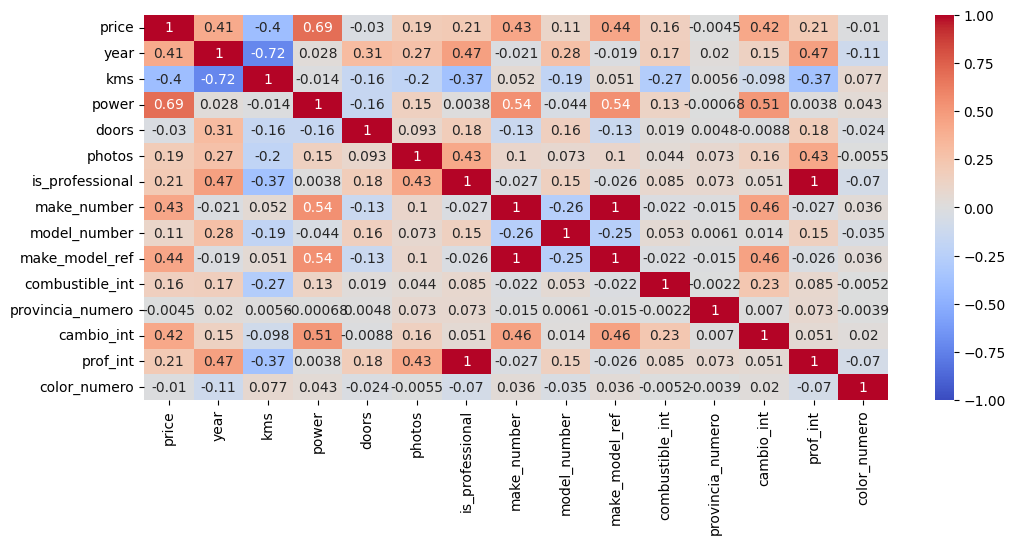

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(df_limpio2.corr(numeric_only=True), cmap='coolwarm', vmin=-1,annot=True)

In [102]:
x= df_limpio2[["power","make_model_ref","cambio_int","year","kms"]]

y= df_limpio2["price"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33006, 5)
(8252, 5)
(33006,)
(8252,)


In [106]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.6244706939747096
MAE 4868.996144725608
MSE 128815175.42754363
RMSE 11349.677327023162


In [108]:
import pickle

# Definir el nombre del archivo
filename = 'primer_modelo.pkl'

# Guardar el modelo en un archivo
with open(filename, 'wb') as file:
    pickle.dump(lr, file)

In [109]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Usar el modelo cargado para hacer predicciones
predicciones = loaded_model.predict(X_test)
print(predicciones)

[28118.49404101 24368.05247556  3139.00880225 ... 23079.28488557
 29265.00742138  4374.15458203]
